# Project 1 - IEE 520 Fall 2020
## Group 3

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [20]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 15)

In [3]:
#Import data
df = pd.read_csv("Avila-DataSet for miniprojects.csv")

In [4]:
#Prep data for modeling
x = df.drop("Class: A, B, C, D, E, F, G, H, I, W, X, Y", axis = 1)
y = df['Class: A, B, C, D, E, F, G, H, I, W, X, Y']

In [5]:
#Model the data
model = GaussianNB()
model.fit(x,y)
yhat = model.predict(x)

In [6]:
#Evaluate the model
metrics.accuracy_score(y,yhat)

0.3002827430871711

In [7]:
print(metrics.classification_report(y,yhat))

              precision    recall  f1-score   support

           A       0.55      0.07      0.13      8572
           B       1.00      1.00      1.00        10
           C       0.05      0.14      0.08       206
           D       0.14      0.25      0.18       705
           E       0.29      0.09      0.14      2190
           F       0.29      0.44      0.35      3923
           G       0.16      0.70      0.26       893
           H       0.22      0.80      0.35      1039
           I       0.73      0.66      0.70      1663
           W       0.13      0.53      0.21        89
           X       0.50      0.64      0.56      1044
           Y       0.50      0.44      0.47       533

    accuracy                           0.30     20867
   macro avg       0.38      0.48      0.37     20867
weighted avg       0.43      0.30      0.26     20867



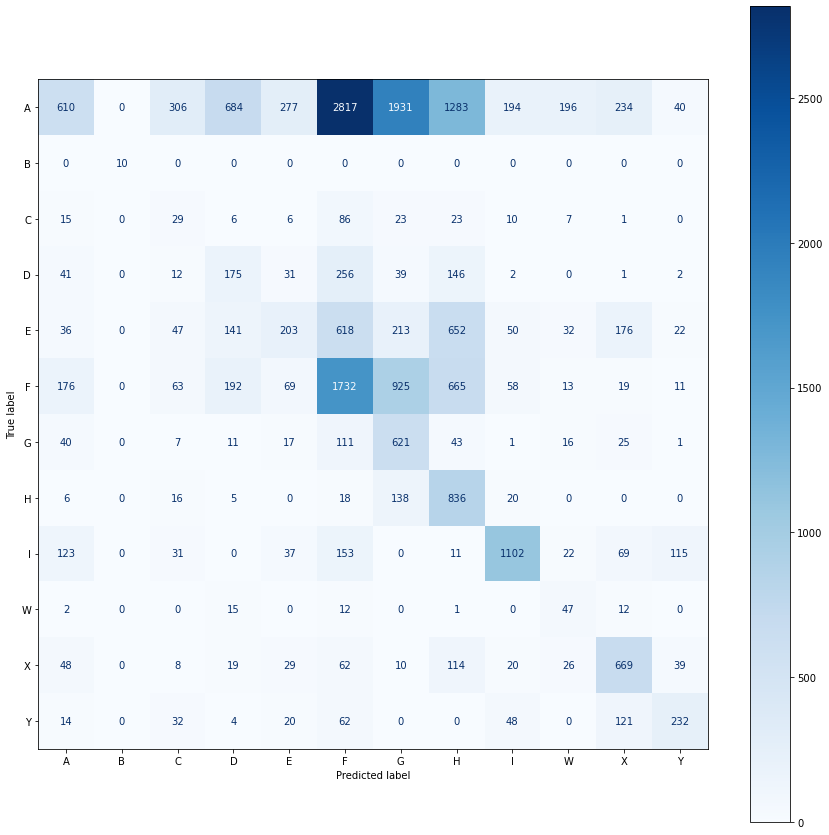

In [21]:
plot_confusion_matrix(model,x,y, cmap=plt.cm.Blues)

In [9]:
# 80 / 20 Split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 520)

In [22]:
# Train 80 / 20 Split
model_split = GaussianNB()
model_split.fit(x_train,y_train)
yhat_split = model.predict(x_test)

In [23]:
#Evaluate the model
metrics.accuracy_score(y_test,yhat_split)

0.29587925251557257

In [24]:
print(metrics.classification_report(y_test,yhat_split))

              precision    recall  f1-score   support

           A       0.53      0.07      0.12      1753
           B       1.00      1.00      1.00         2
           C       0.05      0.12      0.07        40
           D       0.14      0.25      0.18       143
           E       0.31      0.10      0.15       452
           F       0.28      0.44      0.35       735
           G       0.17      0.73      0.28       187
           H       0.21      0.83      0.34       186
           I       0.71      0.63      0.66       337
           W       0.15      0.63      0.24        19
           X       0.49      0.67      0.56       213
           Y       0.43      0.39      0.41       107

    accuracy                           0.30      4174
   macro avg       0.37      0.49      0.36      4174
weighted avg       0.42      0.30      0.26      4174



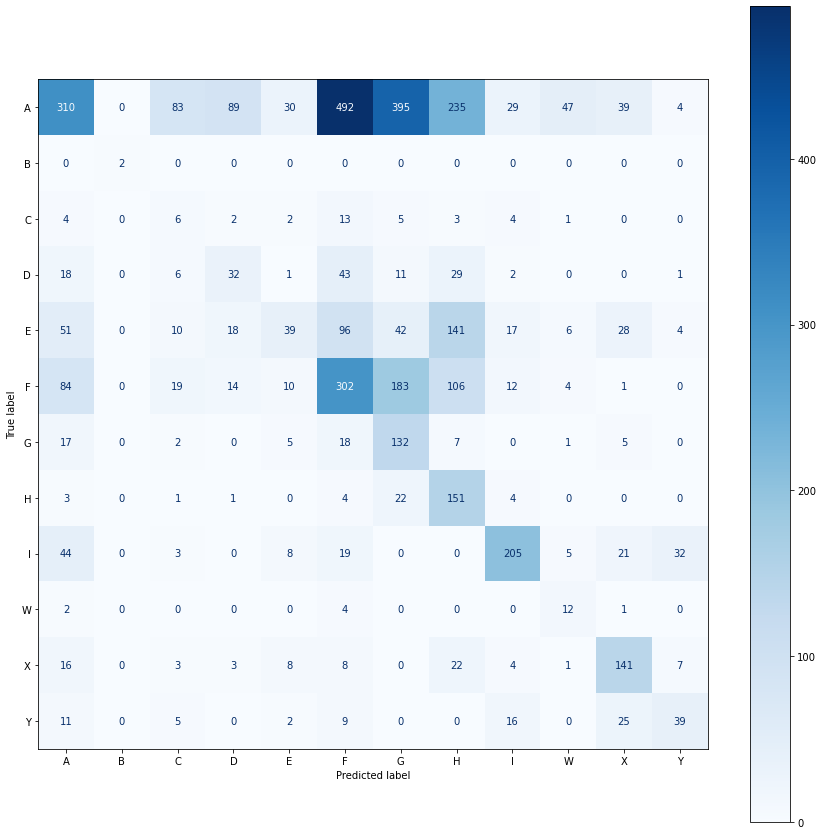

In [25]:
plot_confusion_matrix(model_split,x_test,y_test, cmap=plt.cm.Blues)

In [28]:
#Cross validation
x = df.drop("Class: A, B, C, D, E, F, G, H, I, W, X, Y", axis = 1)
y_p = df["Class: A, B, C, D, E, F, G, H, I, W, X, Y"]

kfold = KFold(n_splits=5, shuffle=True, random_state=3)
yhat_cv = np.ndarray([y_p.shape[0]], dtype="object")
p_prob_cv = np.zeros((x.shape[0],np.unique(y_p).size))

for train, test in kfold.split(x,y_p):
    model_cv = GaussianNB()
    model_cv.fit(x.values[train], y_p.values[train])
    yhat_cv[test] = model_cv.predict(x.values[test])
    p_prob_cv[test] = model_cv.predict_proba(x.values[test])

In [29]:
#Evaluate model
metrics.accuracy_score(y_p,yhat_cv)

0.3046916183447549

In [30]:
print(metrics.classification_report(y_p,yhat_cv))

              precision    recall  f1-score   support

           A       0.54      0.09      0.16      8572
           B       0.83      1.00      0.91        10
           C       0.04      0.09      0.05       206
           D       0.15      0.24      0.18       705
           E       0.32      0.09      0.15      2190
           F       0.29      0.43      0.35      3923
           G       0.16      0.69      0.25       893
           H       0.22      0.80      0.35      1039
           I       0.73      0.66      0.69      1663
           W       0.12      0.49      0.20        89
           X       0.52      0.64      0.57      1044
           Y       0.48      0.41      0.44       533

    accuracy                           0.30     20867
   macro avg       0.37      0.47      0.36     20867
weighted avg       0.43      0.30      0.28     20867



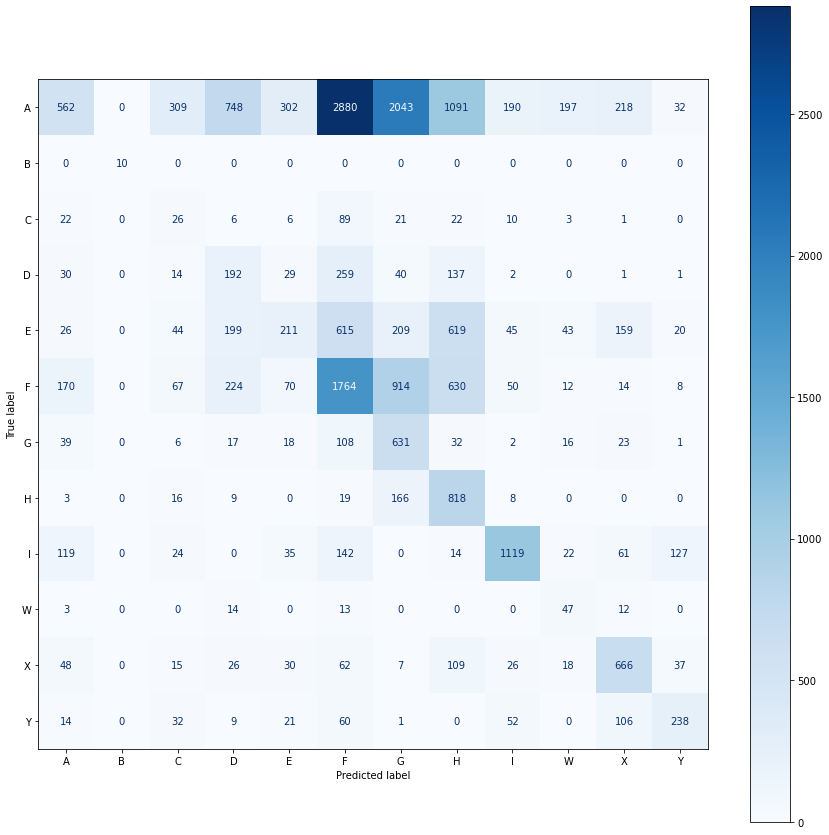

In [31]:
plot_confusion_matrix(model_cv,x,y_p, cmap=plt.cm.Blues)

In [32]:
# Data preparation for ROC curve
from sklearn.preprocessing import label_binarize

y_p = label_binarize(y_p, classes= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "W", "X", "Y"])
n_classes = y_p.shape[1]

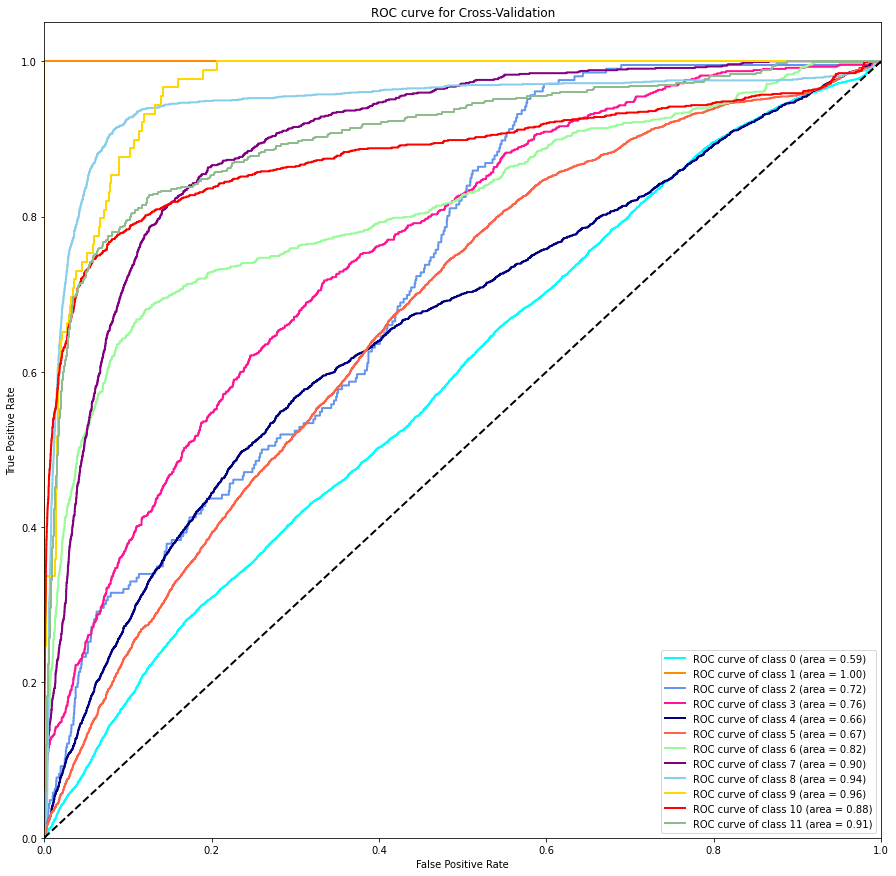

In [34]:
# ROC Curves for Cross-Validation
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_p[:, i], p_prob_cv[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2

plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','deeppink','navy','tomato','palegreen','purple','skyblue','gold','red','darkseagreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Cross-Validation')
plt.legend(loc="lower right")
plt.show()